# Toxic comment classification
# Data exploration and Preprocessing 


In [1]:
import pandas as pd 
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## 1: Upzip

In [2]:

data_dir = './data'

if not os.path.exists(data_dir):
    !unzip ./data/jigsaw-toxic-comment-classification-challenge -d ./data
else:
    print('Raw data already unzipped')

Raw data already unzipped
Raw data already unzipped


2: Preparing and Processing the data



In [3]:

train = pd.read_csv(data_dir+'/train.csv') 

train.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [4]:
test = pd.read_csv(data_dir+'/test.csv') 


test.head(2)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...


In [5]:
train.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-nu

(None, None)

(None, None)

In [6]:
# There are not null entries
print(train.isnull().sum() , test.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64 id              0
comment_text    0
dtype: int64
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64 id              0
comment_text    0
dtype: int64


## Data Exploration

In [7]:
# Create class for non toxic comments
train['not_toxic'] = ( (train.iloc[:,2:].sum(axis=1)) == 0).astype('int')

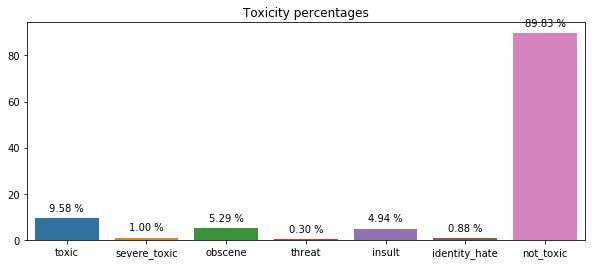

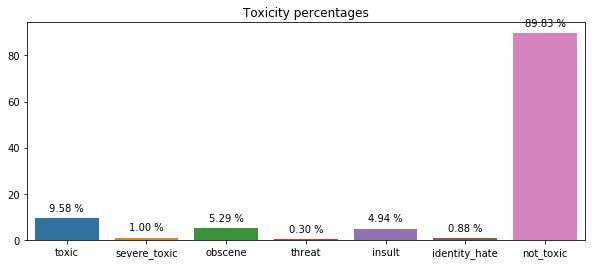

Total records: 159571
Total records: 159571


In [8]:
cols= train.iloc[:,2:]
cols_len= len(cols)
cols = cols.sum()/len(cols) *100

plt.figure(figsize=(10,4))
ax = sns.barplot(cols.index, cols.values)
ax.set_title('Toxicity percentages')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f} %'.format(height), ha="center") 
    
plt.show()
print('Total records: {:d}'.format(cols_len))

**Insight:** There is an imbalance between toxic and non toxic comments.

**Consequnece:** We shall choose metrics to adress this imbalance

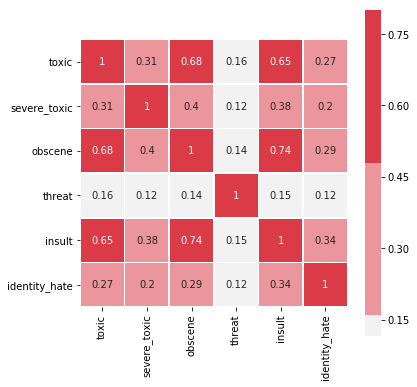

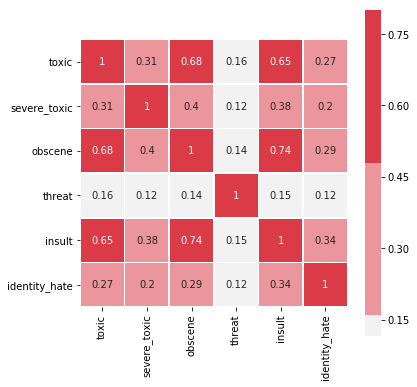

In [9]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(6,6))
corr = train.iloc[:,2:8].corr()
cmap = sns.diverging_palette(240, 10, n=5)
sns.heatmap(corr,  cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, annot=True)

**Insight:** Some correlations are are as low as -0.006, while The highest correlation, 0.75, corresponds to obsene and insult. Perhaps the most remarkable fact is that severe_toxicity is not extremely correlated with other variables like treat!

**Conclusion:** It is reasonable to assume target classes are independent.

In [10]:
train['comment_length'] = train['comment_text'].apply(len)

(array([107496.,  28583.,  10227.,   5125.,   2691.,   1415.,    884.,
           588.,    464.,    384.,    368.,    307.,    265.,    280.,
           494.]),
 array([   6.        ,  338.93333333,  671.86666667, 1004.8       ,
        1337.73333333, 1670.66666667, 2003.6       , 2336.53333333,
        2669.46666667, 3002.4       , 3335.33333333, 3668.26666667,
        4001.2       , 4334.13333333, 4667.06666667, 5000.        ]),
 <a list of 15 Patch objects>)

(array([107496.,  28583.,  10227.,   5125.,   2691.,   1415.,    884.,
           588.,    464.,    384.,    368.,    307.,    265.,    280.,
           494.]),
 array([   6.        ,  338.93333333,  671.86666667, 1004.8       ,
        1337.73333333, 1670.66666667, 2003.6       , 2336.53333333,
        2669.46666667, 3002.4       , 3335.33333333, 3668.26666667,
        4001.2       , 4334.13333333, 4667.06666667, 5000.        ]),
 <a list of 15 Patch objects>)

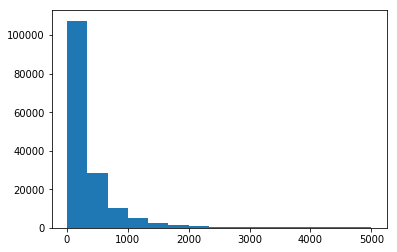

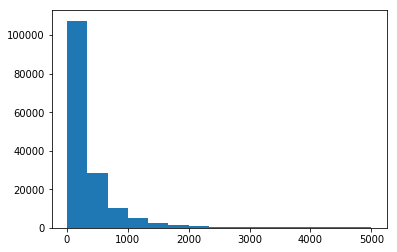

In [11]:
plt.hist(train['comment_length'], bins= 15)

# Preprocessing 

In [12]:
rev=115
print('TRAIN\n')
print(train['comment_text'][rev][:120],'\n')
print('TEST\n')
print(test['comment_text'][rev][:120])

TRAIN

Also I think Vegetable Basket needs it's own Wikipedia page. 

TEST

== scholarly corroboration of folklore == 

 My understanding is that folklore can provide clues to history, medicine, a
TRAIN

Also I think Vegetable Basket needs it's own Wikipedia page. 

TEST

== scholarly corroboration of folklore == 

 My understanding is that folklore can provide clues to history, medicine, a


In [13]:
import re

rep_numbers=re.compile(r'\d+',re.IGNORECASE) # Numbers
rep_special_chars= re.compile("[^\w']|_") # Special character but not apostrophes

def review_to_words(review):  
    
    text=rep_special_chars.sub(' ', review) # Remove special characters but apostrophes    
    text = rep_numbers.sub('n', text) # substitute all numbers  
    words = text.split() # Split string into words
    
    return words

In [14]:
rev=3
print(train['comment_text'][rev],'\n AFTER: \n')
print(review_to_words(train['comment_text'][rev]))

"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.

There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  " 
 AFTER: 

['More', 'I', "can't", 'make', 'any', 'real', 'suggestions', 'on', 'improvement', 'I', 'wondered', 'if', 'the', 'section', 'statistics', 'should', 'be', 'later', 'on', 'or', 'a', 'subsection', 'of', 'types', 'of', 'accidents', 'I', 'think', 'the', 'references', 'may', 'need', 'tidying', 'so', 'that', 'they', 'are', 'all', 'in', 'the', 'exact', 'same', 'format', 'i

In [15]:
train.comment_text = train.comment_text.apply(review_to_words)
test.comment_text = test.comment_text.apply(review_to_words)

**Statistics of number of words**

(array([1.28803e+05, 1.93780e+04, 5.78000e+03, 2.12100e+03, 1.06400e+03,
        6.95000e+02, 5.89000e+02, 4.88000e+02, 4.45000e+02, 1.48000e+02,
        3.10000e+01, 1.30000e+01, 3.00000e+00, 9.00000e+00, 4.00000e+00]),
 array([1.00000000e+00, 9.44666667e+01, 1.87933333e+02, 2.81400000e+02,
        3.74866667e+02, 4.68333333e+02, 5.61800000e+02, 6.55266667e+02,
        7.48733333e+02, 8.42200000e+02, 9.35666667e+02, 1.02913333e+03,
        1.12260000e+03, 1.21606667e+03, 1.30953333e+03, 1.40300000e+03]),
 <a list of 15 Patch objects>)

(array([1.28803e+05, 1.93780e+04, 5.78000e+03, 2.12100e+03, 1.06400e+03,
        6.95000e+02, 5.89000e+02, 4.88000e+02, 4.45000e+02, 1.48000e+02,
        3.10000e+01, 1.30000e+01, 3.00000e+00, 9.00000e+00, 4.00000e+00]),
 array([1.00000000e+00, 9.44666667e+01, 1.87933333e+02, 2.81400000e+02,
        3.74866667e+02, 4.68333333e+02, 5.61800000e+02, 6.55266667e+02,
        7.48733333e+02, 8.42200000e+02, 9.35666667e+02, 1.02913333e+03,
        1.12260000e+03, 1.21606667e+03, 1.30953333e+03, 1.40300000e+03]),
 <a list of 15 Patch objects>)

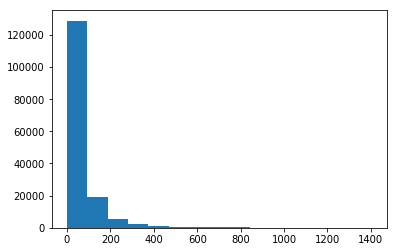

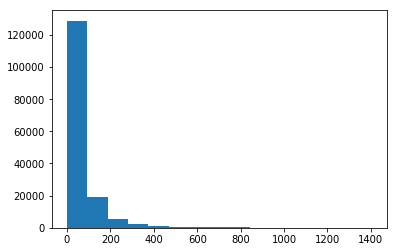

In [16]:
plt.hist(train['comment_text'].apply(len), bins= 15)

In [17]:
train['comment_text'].apply(len).describe()

count    159571.000000
mean         68.151594
std         101.020298
min           1.000000
25%          17.000000
50%          36.000000
75%          76.000000
max        1403.000000
Name: comment_text, dtype: float64

count    159571.000000
mean         68.151594
std         101.020298
min           1.000000
25%          17.000000
50%          36.000000
75%          76.000000
max        1403.000000
Name: comment_text, dtype: float64

In [18]:
# Let us look at super short comments
train[train['comment_text'].apply(len) <4] 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,comment_length
299,00c0ba596a61d32d,"[How, adorably, disingenuous]",0,0,0,0,0,0,1,35
758,02079c62bb22d49f,"[listas, Manos, Family]",0,0,0,0,0,0,1,22
1177,032f9e599b1237c9,"[listas, Schaefer, Nolan]",0,0,0,0,0,0,1,25
1224,034a28e649c2a623,"[July, n, flash]",0,0,0,0,0,0,1,25
1230,034dc5844d5f446b,"[final, unblock, request]",0,0,0,0,0,0,1,21
1474,03f1a5a32c978ffa,"[ManInStone, Sept, n]",0,0,0,0,0,0,1,23
1728,04ad7cd9c786dfae,"[listas, Phillips, Melanie]",0,0,0,0,0,0,1,27
1812,04e6352975d11945,"[Thank, you, Charge]",0,0,0,0,0,0,1,24
2461,06928d7e2969745b,"[unsigned, comment]",0,0,0,0,0,0,1,18
2506,06ad8092fbdae8a2,"[I, understand, now]",0,0,0,0,0,0,1,17


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,comment_length
299,00c0ba596a61d32d,"[How, adorably, disingenuous]",0,0,0,0,0,0,1,35
758,02079c62bb22d49f,"[listas, Manos, Family]",0,0,0,0,0,0,1,22
1177,032f9e599b1237c9,"[listas, Schaefer, Nolan]",0,0,0,0,0,0,1,25
1224,034a28e649c2a623,"[July, n, flash]",0,0,0,0,0,0,1,25
1230,034dc5844d5f446b,"[final, unblock, request]",0,0,0,0,0,0,1,21
1474,03f1a5a32c978ffa,"[ManInStone, Sept, n]",0,0,0,0,0,0,1,23
1728,04ad7cd9c786dfae,"[listas, Phillips, Melanie]",0,0,0,0,0,0,1,27
1812,04e6352975d11945,"[Thank, you, Charge]",0,0,0,0,0,0,1,24
2461,06928d7e2969745b,"[unsigned, comment]",0,0,0,0,0,0,1,18
2506,06ad8092fbdae8a2,"[I, understand, now]",0,0,0,0,0,0,1,17


**Insight: There are some deeply toxic comments. So I wont remove short comments. On the other hand, 
this will not allow me to make a straightforward removal of stopwords since this clearly leave me with zero length comments, which cannot be processed. On the other hand, the mean and std of number of words shows that it make sense to shorten comments to 120. I tried in fact 100,150 and the I obtained the best results with 120.**

In [19]:
def shorten(words):  
    
    return ' '.join(words[:120])

train.comment_text = train.comment_text.apply(shorten)
test.comment_text = test.comment_text.apply(shorten)

I will stop the preprocessing at this pooint. Obviously, many improvements are possible and desirable. However, I reache a good metric results already with this little preprocessing. Future work can try improve metric scores by using a different preprocessing like keeping punctuation, question and exclamation marks, etc.

### To json format

This format is a more comfortable and more importantly safer format to work with pytorch, see [Pytorch Tutorial](https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/C%20-%20Loading%2C%20Saving%20and%20Freezing%20Embeddings.ipynb)

In [20]:
test.to_json(data_dir+'/preprocessed_test.json', orient='records', lines=True)
train.to_json(data_dir+'/preprocessed_train.json', orient='records', lines=True)

In [21]:
train.comment_text[0]

"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren't vandalisms just closure on some GAs after I voted at New York Dolls FAC And please don't remove the template from the talk page since I'm retired now n n n n"

"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren't vandalisms just closure on some GAs after I voted at New York Dolls FAC And please don't remove the template from the talk page since I'm retired now n n n n"

## An approach to deal with apostrophes

In [22]:
def apostrophes(text):
    return re.findall(r"\w+(?=n't)|n't|\w+(?=')|'\w+|\w+",
               text, re.IGNORECASE | re.DOTALL)
#split_apostrophes=re.compile(r"\w+(?=n't)|n't|\w+(?=')|'\w+|\w+",re.IGNORECASE | re.DOTALL) # Numbers

In [23]:
apostrophes("you've it's couldn't don't")

['you', "'ve", 'it', "'s", 'could', "n't", 'do', "n't"]

['you', "'ve", 'it', "'s", 'could', "n't", 'do', "n't"]

In [24]:
train[train[['toxic','severe_toxic','obscene','insult','threat','identity_hate']].sum(axis=1) > 0]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,comment_length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0,44
12,0005c987bdfc9d4b,Hey what is it talk What is it an exclusive gr...,1,0,0,0,0,0,0,319
16,0007e25b2121310b,Bye Don't look come or think of comming back T...,1,0,0,0,0,0,0,57
42,001810bf8c45bf5f,You are gay or antisemmitian Archangel WHite T...,1,0,1,0,1,1,0,648
43,00190820581d90ce,FUCK YOUR FILTHY MOTHER IN THE ASS DRY,1,0,1,0,1,0,0,40
44,001956c382006abd,I'm Sorry I'm sorry I screwed around with some...,1,0,0,0,0,0,0,319
51,001dc38a83d420cf,GET FUCKED UP GET FUCKEEED UP GOT A DRINK THAT...,1,0,1,0,0,0,0,124
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,0,89
56,0020fd96ed3b8c8b,Tony Sidaway is obviously a fistfuckee He love...,1,0,1,0,1,0,0,68
58,0021fe88bc4da3e6,My Band Page's deletion You thought I was gone...,1,0,1,0,0,0,0,1798


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,comment_length
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0,44
12,0005c987bdfc9d4b,Hey what is it talk What is it an exclusive gr...,1,0,0,0,0,0,0,319
16,0007e25b2121310b,Bye Don't look come or think of comming back T...,1,0,0,0,0,0,0,57
42,001810bf8c45bf5f,You are gay or antisemmitian Archangel WHite T...,1,0,1,0,1,1,0,648
43,00190820581d90ce,FUCK YOUR FILTHY MOTHER IN THE ASS DRY,1,0,1,0,1,0,0,40
44,001956c382006abd,I'm Sorry I'm sorry I screwed around with some...,1,0,0,0,0,0,0,319
51,001dc38a83d420cf,GET FUCKED UP GET FUCKEEED UP GOT A DRINK THAT...,1,0,1,0,0,0,0,124
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,0,89
56,0020fd96ed3b8c8b,Tony Sidaway is obviously a fistfuckee He love...,1,0,1,0,1,0,0,68
58,0021fe88bc4da3e6,My Band Page's deletion You thought I was gone...,1,0,1,0,0,0,0,1798


In [25]:
train[train[['toxic','severe_toxic','obscene','insult','threat','identity_hate']].sum(axis=1) == 0]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,comment_length
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,1,264
1,000103f0d9cfb60f,D'aww He matches this background colour I'm se...,0,0,0,0,0,0,1,112
2,000113f07ec002fd,Hey man I'm really not trying to edit war It's...,0,0,0,0,0,0,1,233
3,0001b41b1c6bb37e,More I can't make any real suggestions on impr...,0,0,0,0,0,0,1,622
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0,1,67
5,00025465d4725e87,Congratulations from me as well use the tools ...,0,0,0,0,0,0,1,65
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1,70
10,0005300084f90edc,Fair use rationale for Image Wonju jpg Thanks ...,0,0,0,0,0,0,1,2875


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,comment_length
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,1,264
1,000103f0d9cfb60f,D'aww He matches this background colour I'm se...,0,0,0,0,0,0,1,112
2,000113f07ec002fd,Hey man I'm really not trying to edit war It's...,0,0,0,0,0,0,1,233
3,0001b41b1c6bb37e,More I can't make any real suggestions on impr...,0,0,0,0,0,0,1,622
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0,1,67
5,00025465d4725e87,Congratulations from me as well use the tools ...,0,0,0,0,0,0,1,65
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1,70
10,0005300084f90edc,Fair use rationale for Image Wonju jpg Thanks ...,0,0,0,0,0,0,1,2875
